# Exploring Weather Trends with SQL and Python

### Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### Instructions
Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

- **Extract the data** from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
    - Write a SQL query to extract the city level data. Export to CSV.
    - Write a SQL query to extract the global data. Export to CSV.
    
- **Open up the CSV** in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.

- **Create a line chart** that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

- **Make observations** about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    - Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    - “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    - What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

### Submission
Your submission should be a PDF that includes:

- An **outline** of steps taken to prepare the data to be visualized in the chart, such as:
    - What tools did you use for each step? (Python, SQL, Excel, etc)
    - How did you calculate the moving average?
    - What were your key considerations when deciding how to visualize the trends?
- **Line chart** with local and global temperature trends
- At least **four observations** about the similarities and/or differences in the trends

## 1. Extract the Data from the Database

### City chosen: Philadelphia, PA, USA

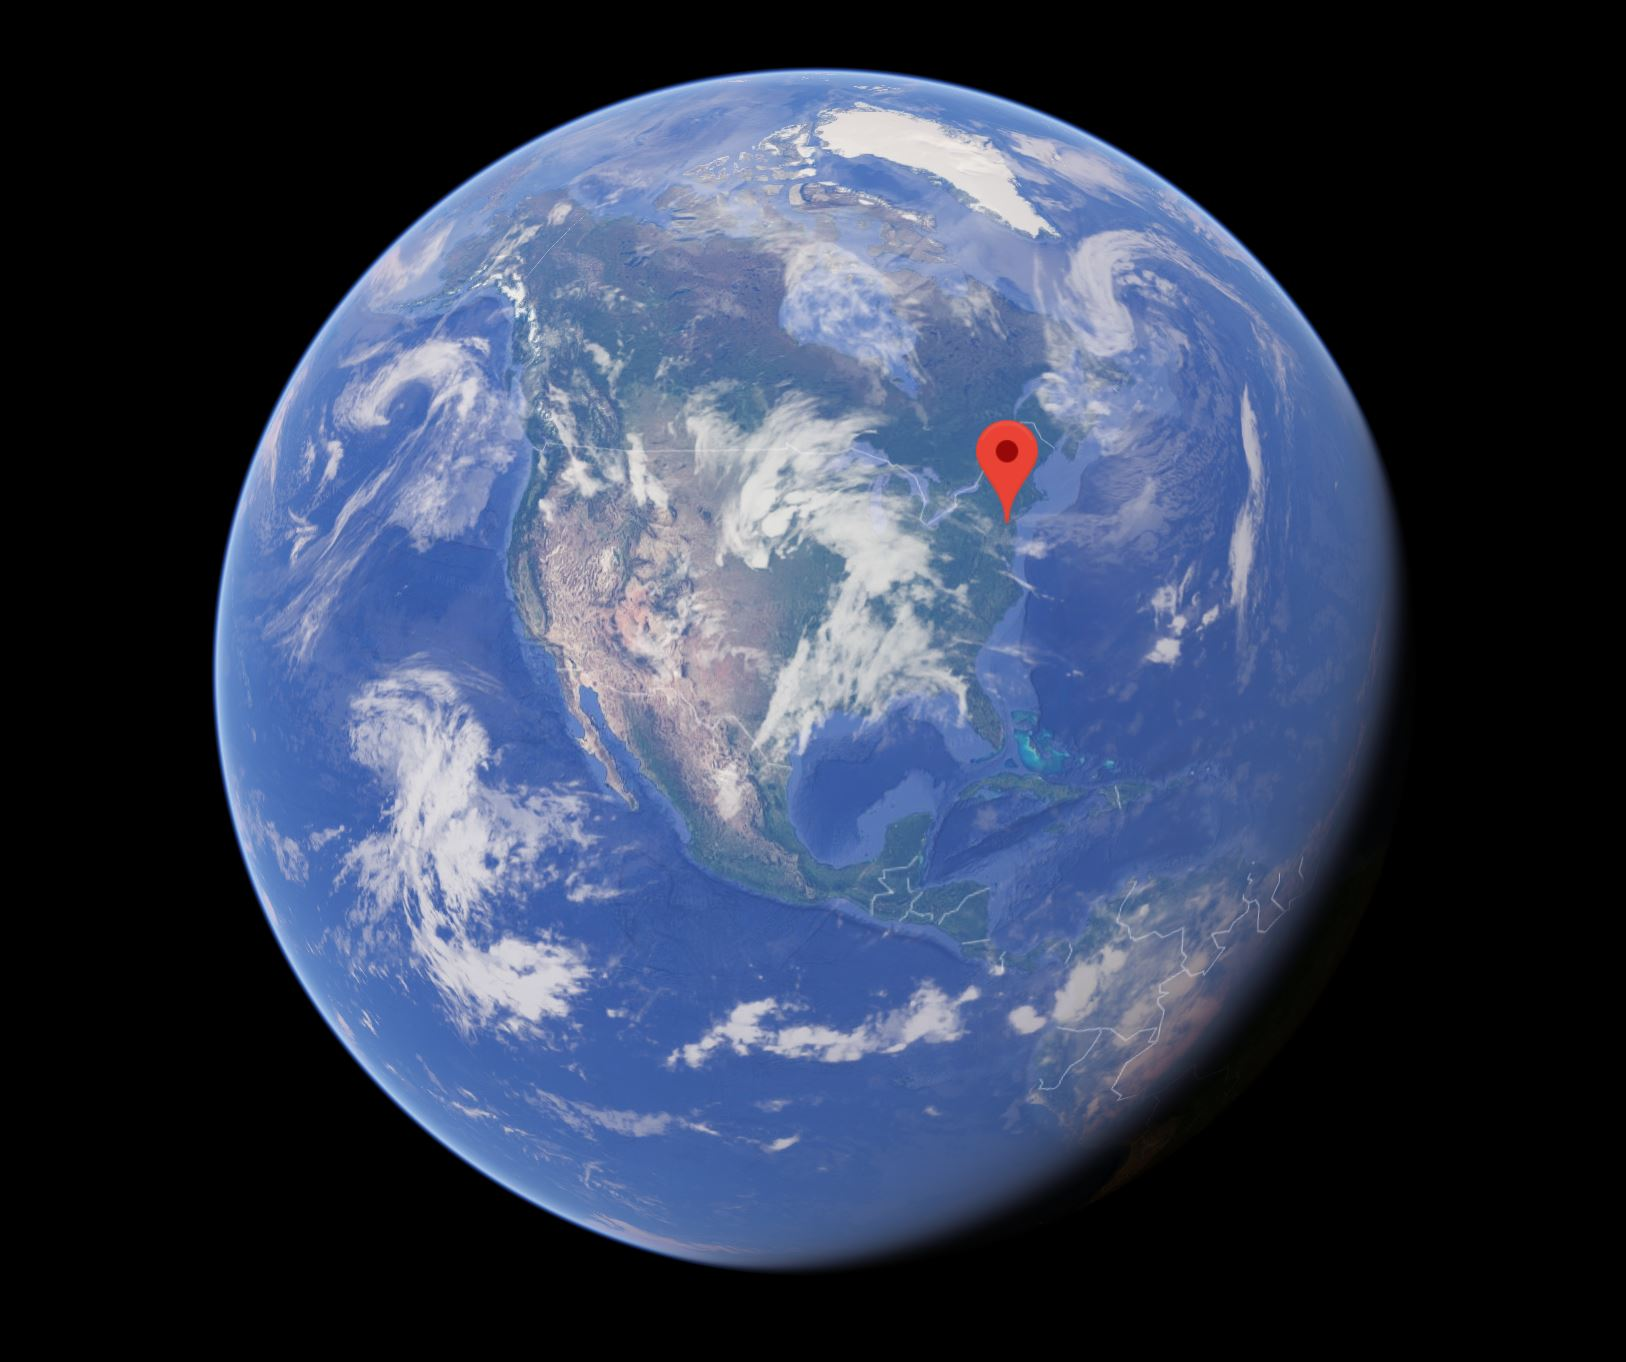

In [4]:
from IPython.display import display, Image
display(Image('philadelphia_globe.jpg', width=750))

**Preview**
```
SELECT * FROM city_data WHERE city = 'Philadelphia'
LIMIT 10
```


| year | city         | country       | avg_temp |
|------|--------------|---------------|----------|
| 1743 | Philadelphia | United States | 6.07     |
| 1744 | Philadelphia | United States | 13.74    |
| 1745 | Philadelphia | United States | 3.96     |
| 1746 | Philadelphia | United States |          |
| 1747 | Philadelphia | United States |          |
| 1748 | Philadelphia | United States |          |
| 1749 | Philadelphia | United States |          |
| 1750 | Philadelphia | United States | 12.36    |
| 1751 | Philadelphia | United States | 13.05    |
| 1752 | Philadelphia | United States | 5.64     |

**Query**
```
SELECT * FROM city_data WHERE city = 'Philadelphia'
```

### Global data

**Preview**
```
SELECT * FROM global_data
LIMIT 10
```
| year | avg_temp |
|------|----------|
| 1750 | 8.72     |
| 1751 | 7.98     |
| 1752 | 5.78     |
| 1753 | 8.39     |
| 1754 | 8.47     |
| 1755 | 8.36     |
| 1756 | 8.85     |
| 1757 | 9.02     |
| 1758 | 6.74     |
| 1759 | 7.99     |

**Query**
```
SELECT * FROM global_data
```

<function matplotlib.pyplot.show(*args, **kw)>

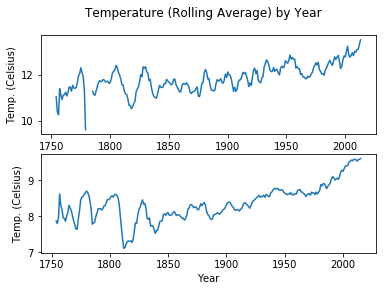

In [46]:
# %%writefile weather_trends.py

import pandas as pd
import matplotlib.pyplot as plt

city_data = pd.read_csv('city_data.csv')
city_data['rolling_avg'] = city_data['avg_temp'].rolling(window=5).mean()


global_data = pd.read_csv('global_data.csv')
global_data['rolling_avg'] = global_data['avg_temp'].rolling(window=5).mean()


fig, axs = plt.subplots(2,1)

axs[0].plot(city_data['year'].values, city_data['rolling_avg'].values)
axs[1].plot(global_data['year'].values, global_data['rolling_avg'].values)
axs[1].set_xlabel('Year')
axs[0].set_ylabel('Temp. (Celsius)')
axs[1].set_ylabel('Temp. (Celsius)')
fig.suptitle('Temperature (Rolling Average) by Year')
plt.show

# Rubric


| Criteria                                                             | Meets Specifications                                                                                                              |
|:---------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------------|
| Student is able to extract data from a database using SQL.           | - The SQL query used to extract the data is included.<br>   - The query runs without error and pulls the intended data.               |
| Student is able to manipulate data in a spreadsheet or similar tool. | Moving averages are calculated to be used in the line chart.                                                                      |
| Student is able to create a clear data visualization.                | - A line chart is included in the submission.<br>- The chart and its axes have titles, and there's a clear legend (if applicable). |
| Student is able to interpret a data visualization.                   | - The student includes four observations about their provided data visualization.<br>- The four observations are accurate.         |

**Suggestions to make your project stand out**: 

Think about other ways to compare and find insights from this data beyond interpreting the chart. Here are a few ideas:
- What's the correlation coefficient?
- Can you estimate the average temperature in your city based on the average global temperature?
- Multiple cities - Add your favorite cities from around the globe to your visualization. What do you learn about them?